In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import uniform
from config import api_key
import citipy.citipy as cit
import openweathermapy.core as owm

In [5]:
# randonly get 500 set lat and lng combinations

lat_lng_list = []

for i in range(600):

    (x, y) = uniform(-90, 90), uniform(-180,180)
    
    lat_lng_list.append((x, y))
    
    
#lat_lng_list[0:3]

[(51.784387587065254, -21.75486971018171),
 (66.8331762578949, -96.86241798056535),
 (-77.49542528074187, -54.154542755260195)]

In [6]:
# get 500 cities 
city_list = []

for i in lat_lng_list:

    city_name = cit.nearest_city(i[0], i[1]).city_name
    city_list.append(city_name)

    
#len(city_list)

['dingle', 'thompson', 'ushuaia', 'ocampo', 'kodiak', 'konskie', 'georgetown', 'kuche', 'dossor', 'fukue', 'otradinskiy', 'rikitea', 'qaanaaq', 'faanui', 'mataura', 'jamestown', 'nardaran', 'tasiilaq', 'belushya guba', 'castro', 'bethel', 'ponta do sol', 'bluff', 'carnarvon', 'charters towers', 'avarua', 'gobabis', 'jamestown', 'lata', 'dudinka', 'thompson', 'almeirim', 'one hundred mile house', 'dalvik', 'tuatapere', 'hovd', 'rikitea', 'port-gentil', 'kapaa', 'soyo', 'narsaq', 'bredasdorp', 'saint-philippe', 'vaini', 'ushuaia', 'ribeira grande', 'hobart', 'amderma', 'albany', 'hobart', 'eureka', 'carnarvon', 'laguna', 'tumannyy', 'rikitea', 'kloulklubed', 'bluff', 'belushya guba', 'remedios', 'ushuaia', 'panzhihua', 'illoqqortoormiut', 'cape town', 'taolanaro', 'hobart', 'ribeira grande', 'makakilo city', 'nikolskoye', 'longyearbyen', 'zhezkazgan', 'chokurdakh', 'east london', 'mys shmidta', 'katsuura', 'bengkulu', 'kuching', 'hobart', 'pennsville', 'sitka', 'labytnangi', 'ponta do so

600

In [7]:
# get api call and get response info

settings = {"units": "imperial", "appid": api_key}

info = []

for i in city_list:

    try:
        current_weather = owm.get_current(i, **settings)
        summary = ["name","main.temp", "main.humidity", "wind.speed", "clouds.all", "coord.lat"]
        data = current_weather(*summary)
        info.append(data)
        
        
    except:
        print("invalid city")

        
#print(info)

invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
invalid city
[('Dingle', 74.66, 99, 15.99, 92, 11), ('Thompson', 24.8, 58, 11.41, 75, 55.74), ('Ushuaia', 46.4, 70, 9.17, 40, -54.81), ('Ocampo', 79.74, 90, 14.83, 76, 13.56), ('Kodiak', 35.6, 80, 14.99, 90, 39.95), ('Konskie', 44.91, 94, 13.65, 76, 51.19), ('Georgetown', 73.4, 94, 4.

In [10]:
df = pd.DataFrame(info)

df.columns = ["city","temperature", "humidity", "wind_speed", "Cloudiness", "latitude"]

#print(df)

df.to_csv("data.csv",encoding="utf-8", index=False)

                          city  temperature  humidity  wind_speed  Cloudiness  \
0                       Dingle        74.66        99       15.99          92   
1                     Thompson        24.80        58       11.41          75   
2                      Ushuaia        46.40        70        9.17          40   
3                       Ocampo        79.74        90       14.83          76   
4                       Kodiak        35.60        80       14.99          90   
5                      Konskie        44.91        94       13.65          76   
6                   Georgetown        73.40        94        4.70           0   
7                       Dossor        19.31        88        9.62          76   
8                        Fukue        53.60        37       10.29           0   
9                      Rikitea        80.28       100       18.23          88   
10                     Qaanaaq       -11.03       100        2.35          56   
11                      Faan

In [11]:
print(len(df))

544


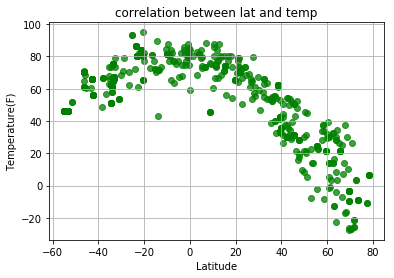

In [15]:
plt.scatter(df["latitude"], df["temperature"], marker="o", facecolors="green", alpha=0.75)
plt.title("correlation between lat and temp")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.grid()
plt.savefig("temp.png")
plt.show()


# the temperature is the higest when the latitude is near 0, and then the temp gets lower when the 
#latitude spread from 0 to two other sides. 

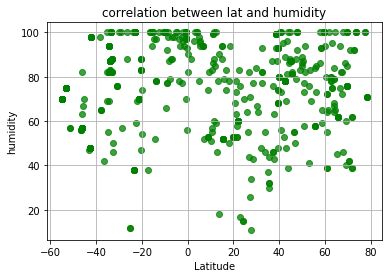

In [16]:
plt.scatter(df["latitude"], df["humidity"], marker="o", facecolors="green", alpha=0.75)
plt.title("correlation between lat and humidity")
plt.xlabel("Latitude")
plt.ylabel("humidity")
plt.grid()
plt.savefig("humidity.png")
plt.show()




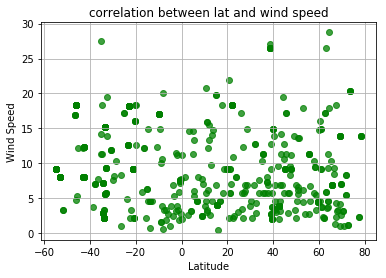

In [17]:
plt.scatter(df["latitude"], df["wind_speed"], marker="o", facecolors="green", alpha=0.75)
plt.title("correlation between lat and wind speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("wind_speed.png")
plt.show()


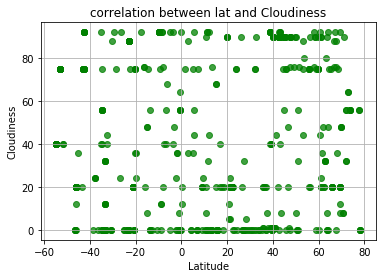

In [19]:
plt.scatter(df["latitude"], df["Cloudiness"], marker="o", facecolors="green", alpha=0.75)
plt.title("correlation between lat and Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("cloud.png")
plt.show()
